### Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

###### Importing library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
bb=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")
bb.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


###### Columns meaning

R- Runs

AB- At Bats (At bat (AB) is a batter's turn batting against a pitcher).

H- Hits (Hit is credited to a batter when the batter safely reaches or passes first base after hitting the ball into fair territory).

2B- Doubles

3B- Triples

HR- Homeruns (Homeruns is scored when the ball is hit in such a way that the batter is able to circle the bases and reach home safely in one play without any errors being committed by the defensive team in the process.)

SB- Stolen Bases(A stolen base occurs when a baserunner advances by taking a base to which he isn't entitled. This generally occurs when a pitcher is throwing a pitch).

RA- Runs Allowed

ER- Earned Runs (a run scored without the aid of errors by the team in the field)

ERA- Earned Run Average (earned run average (ERA) is the average of earned runs allowed by a pitcher per nine innings pitched)

CG- Complete Games(A pitcher earns a complete game)

E- Errors

Sv- Saves(A save is awarded to the relief pitcher who finishes a game for the winning team, under certain circumstances.)

SHO- Shutouts(when one team fails to score a single run throughout a game called shutouts)

BB- Base on balls (also called a "walk")

SO- Strikeout(A strikeout occurs when a batter accrues three strikes during a time at bat. It usually means the batter is out. )

W- Number of predicted wins(Target) 

###### Setting the Target colunm 

In [3]:
bb['W_Target']=bb['W']

In [4]:
bb.drop(['W'],axis=1,inplace=True)

In [5]:
bb.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E,W_Target
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88,95
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86,83
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79,81
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101,76
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86,74


In [6]:
bb.shape

(30, 17)

In [7]:
bb.dtypes

R             int64
AB            int64
H             int64
2B            int64
3B            int64
HR            int64
BB            int64
SO            int64
SB            int64
RA            int64
ER            int64
ERA         float64
CG            int64
SHO           int64
SV            int64
E             int64
W_Target      int64
dtype: object

In [8]:
bb.isnull().sum()

R           0
AB          0
H           0
2B          0
3B          0
HR          0
BB          0
SO          0
SB          0
RA          0
ER          0
ERA         0
CG          0
SHO         0
SV          0
E           0
W_Target    0
dtype: int64

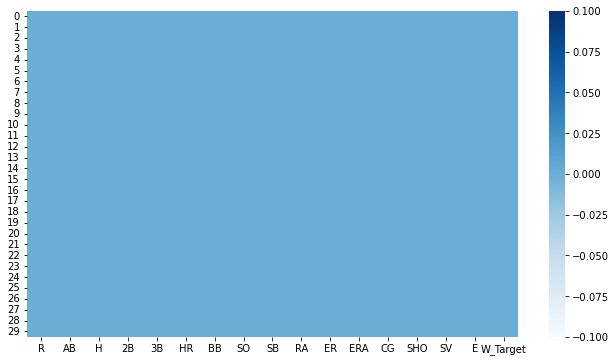

In [9]:
plt.figure(figsize=[11,6])
sns.heatmap(bb.isnull(),cmap='Blues')
plt.show()

### Observation-1 :

In the above dataset :

1) The size of table is 30*17  i.e. no. of rows are 30 and no. of columns are 17(including target).

2)  All the input data are continous in nature (absence of categorical data),So there is no need to converting the values into the numeric format i.e Encoading will not be used.

3) Null values are not present as we can see in seaborn heat map, So there is no need to adopt imputation technique.

.

# EDA
###### Exploratory Data Analysis (EDA): 
    EDA process will give us the batter understanding towards the pattern of Dataset

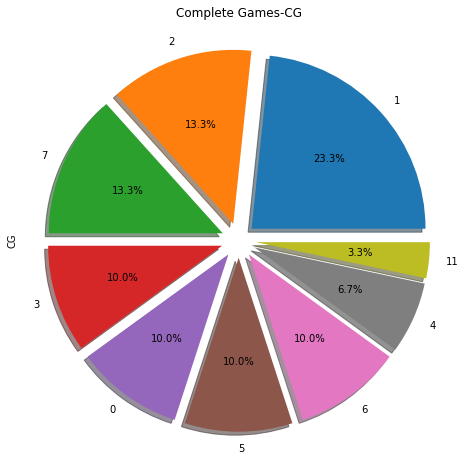

In [10]:
plt.title('Complete Games-CG')
bb.CG.value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],autopct="%1.1f%%",shadow=True,figsize=(8,8))
plt.show()


Seaborn countplot method is used to Show the counts of observations in each categorical bin using bars.

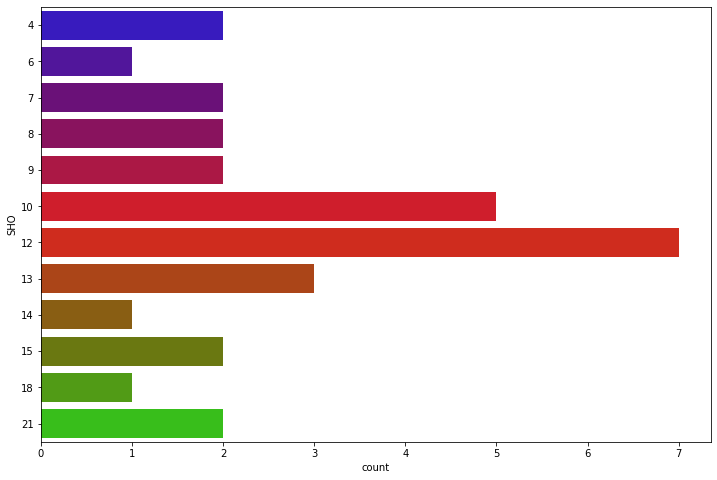

In [11]:
plt.figure(figsize=[12,8])
sns.countplot(y=bb['SHO'],palette='brg')
plt.show()

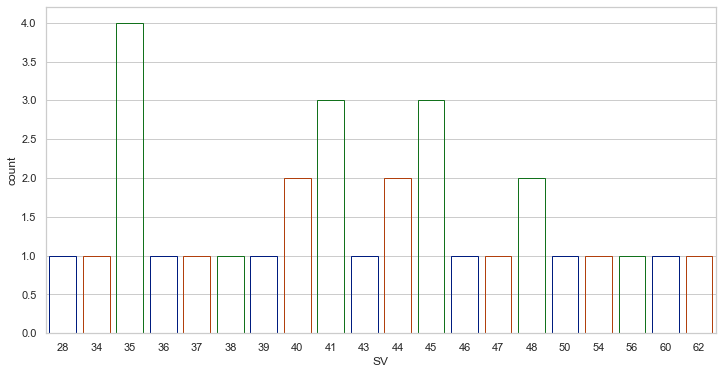

In [12]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=[12,6])
sns.countplot(bb['SV'],facecolor=(0,0,0,0),edgecolor=sns.color_palette('dark',3))
plt.show()

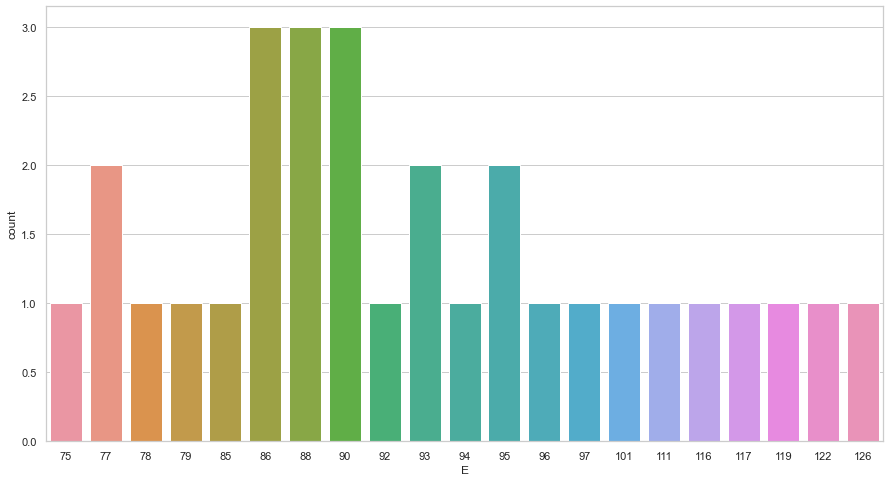

In [13]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=[15,8])
sns.countplot(bb['E'])
plt.show()

Violin Plot is a method to visualize the distribution of numerical data of different variables

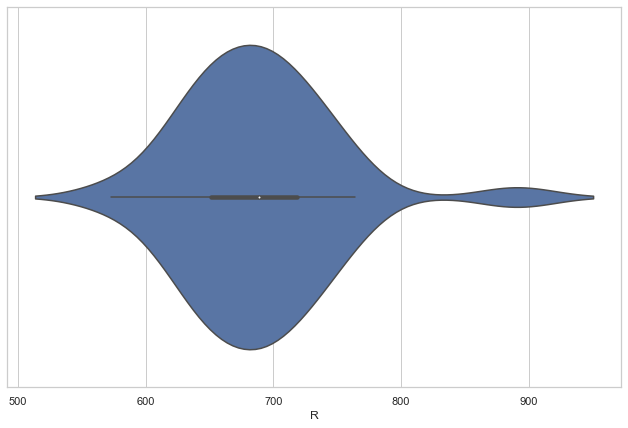

In [14]:
plt.figure(figsize=[11,7])
sns.violinplot(bb['R'])
plt.show()

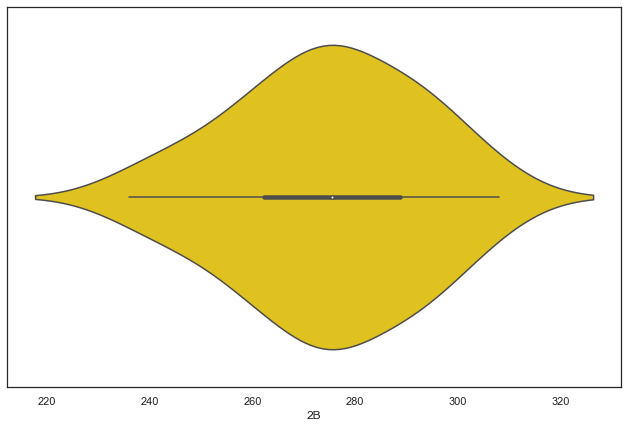

In [15]:
sns.set_theme(style="white")
plt.figure(figsize=[11,7])
sns.violinplot(bb['2B'],palette='prism')
plt.show()

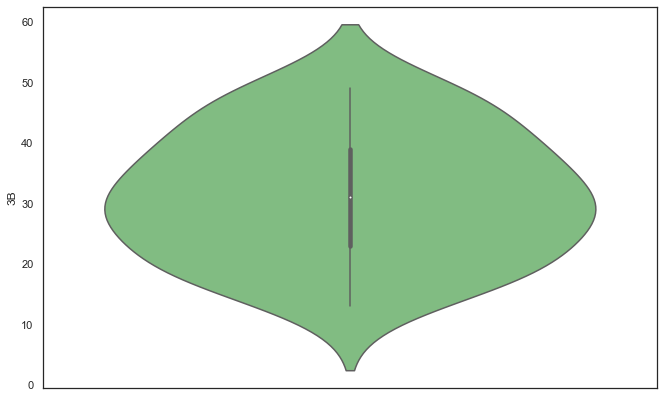

In [16]:
plt.figure(figsize=[11,7])
sns.violinplot(y=bb['3B'],palette='YlGn')
plt.show()

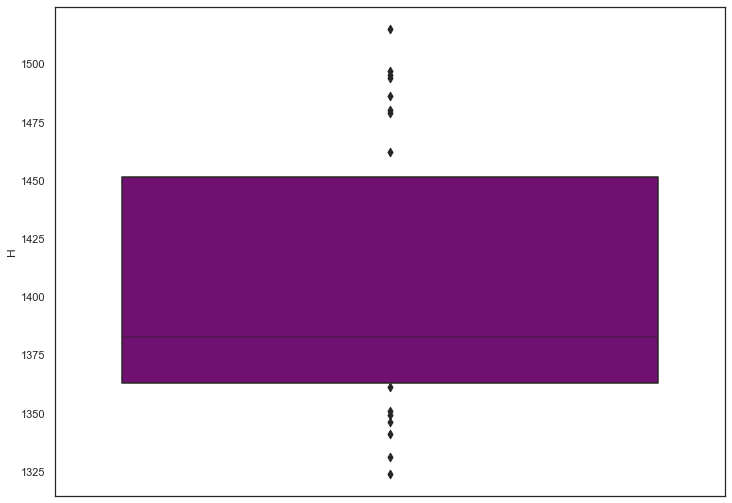

In [17]:
sns.set_theme(style="white")
plt.figure(figsize=[12,9])
sns.boxenplot(y="H",color="purple",scale="linear", data=bb)
plt.show()

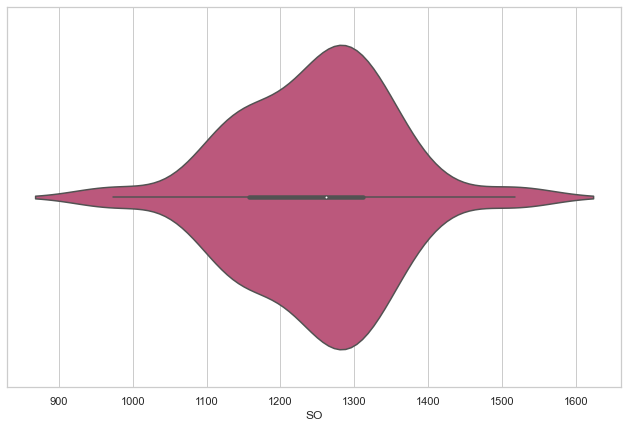

In [18]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=[11,7])
sns.violinplot(bb['SO'],palette='plasma')
plt.show()

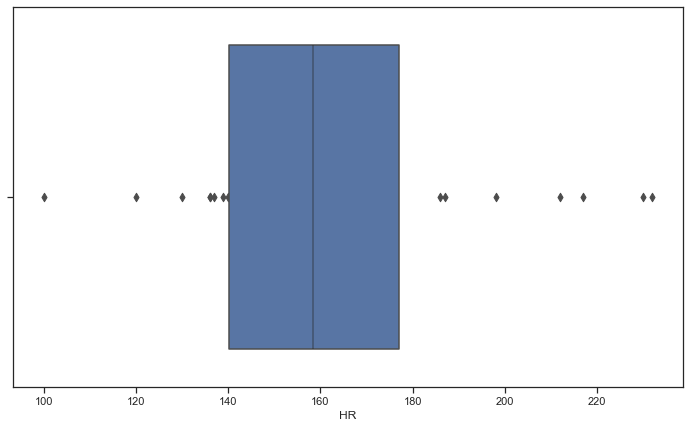

In [19]:
sns.set_theme(style="ticks")
plt.figure(figsize=[12,7])
sns.boxenplot("HR",color="b", data=bb)
plt.show()

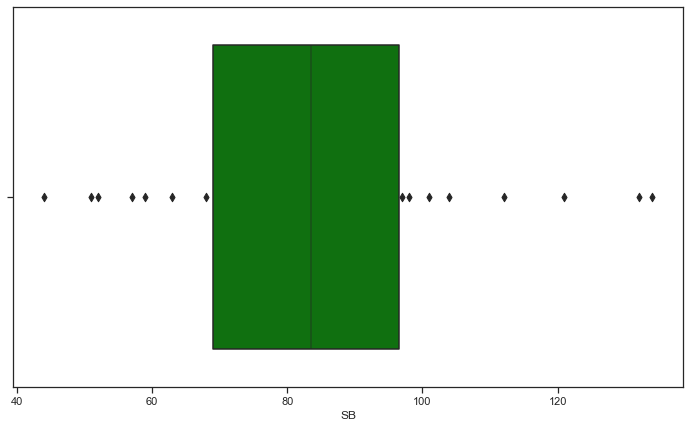

In [20]:
sns.set_theme(style="ticks")
plt.figure(figsize=[12,7])
sns.boxenplot("SB",color="green", data=bb)
plt.show()

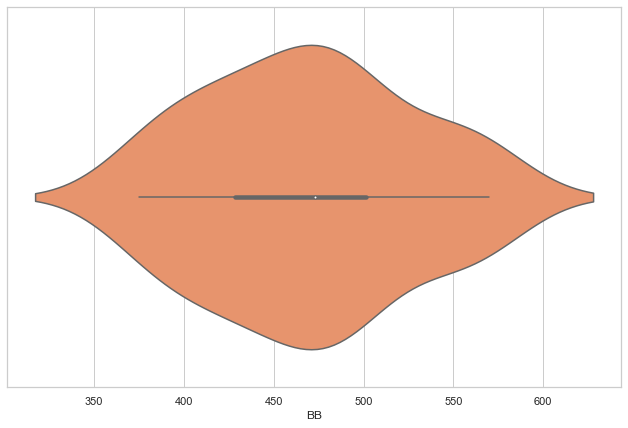

In [21]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=[11,7])
sns.violinplot(bb['BB'],palette='OrRd')
plt.show()

## Checking Outliers

In [22]:
bb.describe()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E,W_Target
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333,80.966667
std,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889,10.453455
min,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000,63.000000
25%,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000,74.000000
50%,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000,81.000000
75%,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000,87.750000
max,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000,100.000000


R        AxesSubplot(0.125,0.657941;0.227941x0.222059)
AB    AxesSubplot(0.398529,0.657941;0.227941x0.222059)
H     AxesSubplot(0.672059,0.657941;0.227941x0.222059)
2B       AxesSubplot(0.125,0.391471;0.227941x0.222059)
3B    AxesSubplot(0.398529,0.391471;0.227941x0.222059)
HR    AxesSubplot(0.672059,0.391471;0.227941x0.222059)
BB          AxesSubplot(0.125,0.125;0.227941x0.222059)
SO       AxesSubplot(0.398529,0.125;0.227941x0.222059)
SB       AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

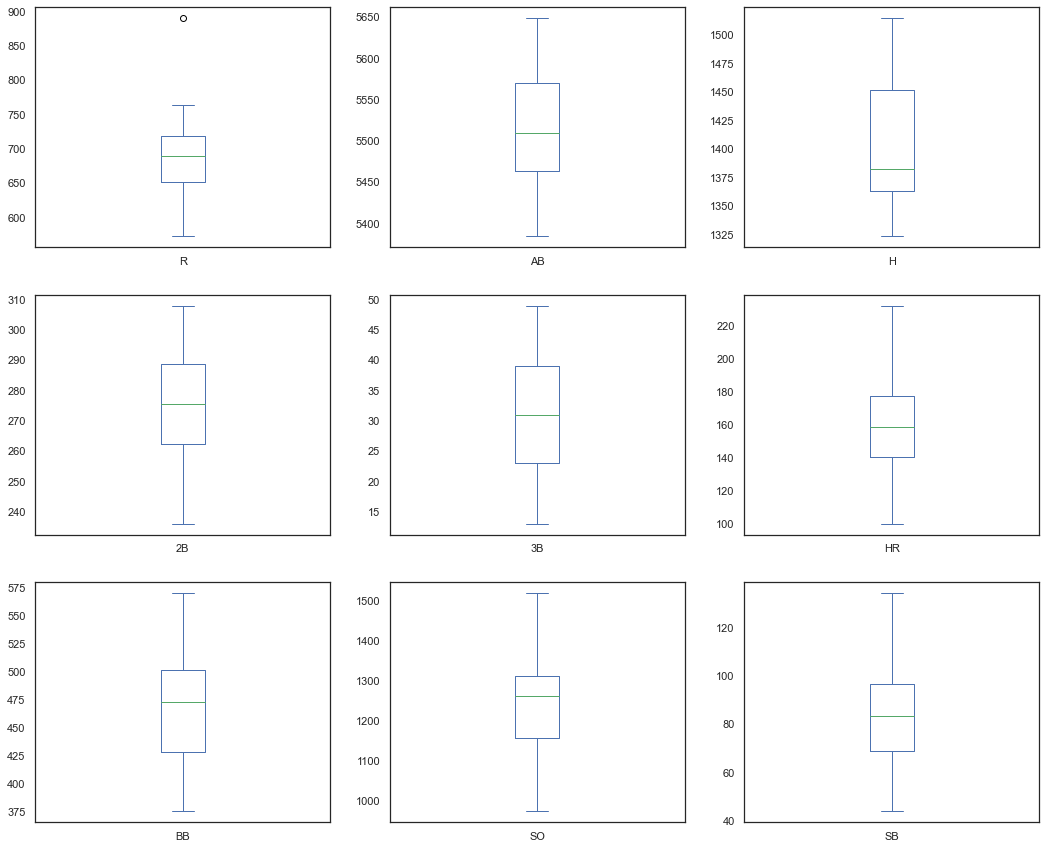

In [23]:
sns.set_theme(style="white")
bb.iloc[:,0:9].plot(kind='box',subplots=True,layout=(3,3),figsize=[18,15])

RA             AxesSubplot(0.125,0.657941;0.227941x0.222059)
ER          AxesSubplot(0.398529,0.657941;0.227941x0.222059)
ERA         AxesSubplot(0.672059,0.657941;0.227941x0.222059)
CG             AxesSubplot(0.125,0.391471;0.227941x0.222059)
SHO         AxesSubplot(0.398529,0.391471;0.227941x0.222059)
SV          AxesSubplot(0.672059,0.391471;0.227941x0.222059)
E                 AxesSubplot(0.125,0.125;0.227941x0.222059)
W_Target       AxesSubplot(0.398529,0.125;0.227941x0.222059)
dtype: object

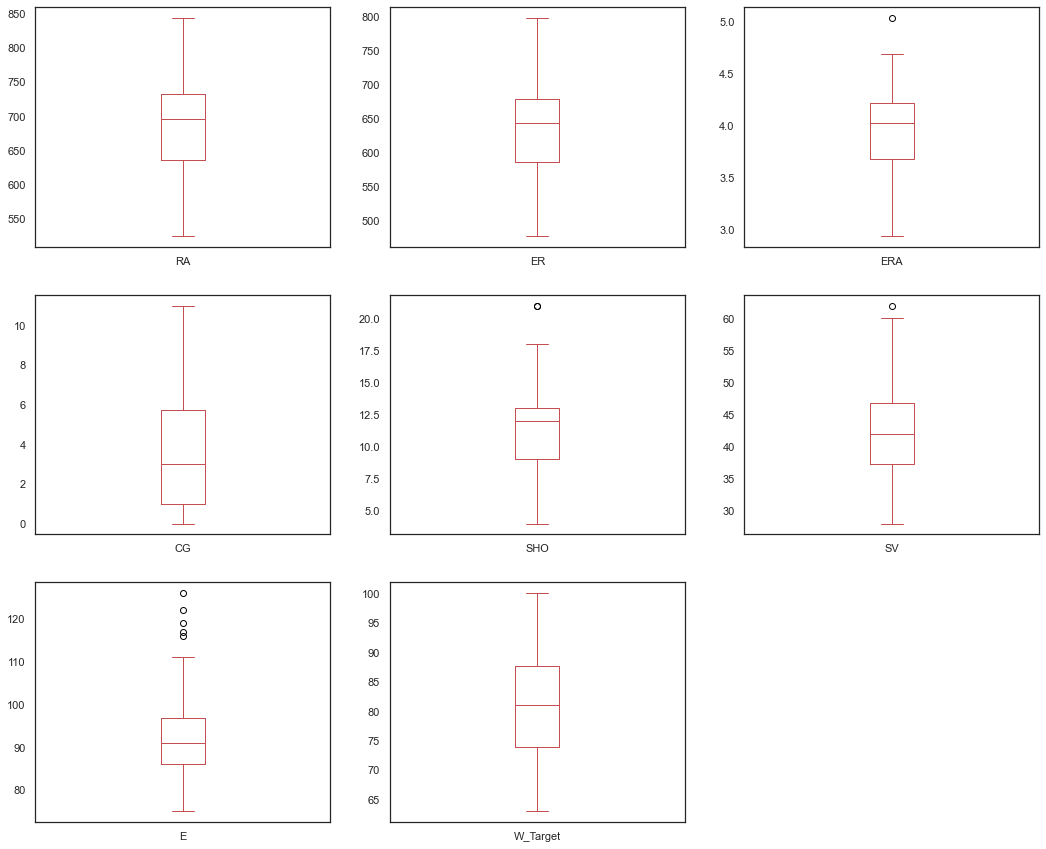

In [24]:
bb.iloc[:,9:].plot(kind='box',subplots=True,layout=(3,3),figsize=[18,15],color='r')

### Observation-3

In the above data set very few outliers are present..

1. Runs colunm has very less outliers or we can say the outliers are negligible in runs colunm.


2. In the Hits(H),2B,3B and HR(homeruns) colunms outliers are not present because the data are less spreded.


3. Similerily in the BB, SO, SB, RA, ER and CG colunms the chances of outliers are zero because the data are less spreded.


Note- When we say the data are less spreded it means the gap between mean and standard deviation and the gap between mean and maximum values is very less.
If the gap is bigger then the chances of outliers will be increases.


4. In the error colunm the many outliers are present because its mean is 91 while the maximum value is 126, The mean is sensitive to outliers but the fact that mean is so small compared to the max value indicates the outliers are present.

5. SHO and SV colunm represent the presenceness of some outliers.


With the help of zscore method we will remove the outliers.

In [25]:
outliers_present=bb[['R','ERA','SHO','E','SV']]

## Checking Skewness 

In [26]:
from scipy.stats import skew

In [27]:
bb.skew()

R           1.200786
AB          0.183437
H           0.670254
2B         -0.230650
3B          0.129502
HR          0.516441
BB          0.158498
SO         -0.156065
SB          0.479893
RA          0.045734
ER          0.058710
ERA         0.053331
CG          0.736845
SHO         0.565790
SV          0.657524
E           0.890132
W_Target    0.047089
dtype: float64

R
1.1398931660307043


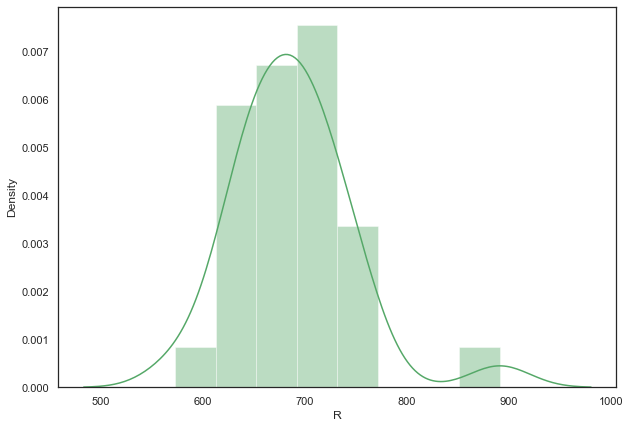

AB
0.17413429032352498


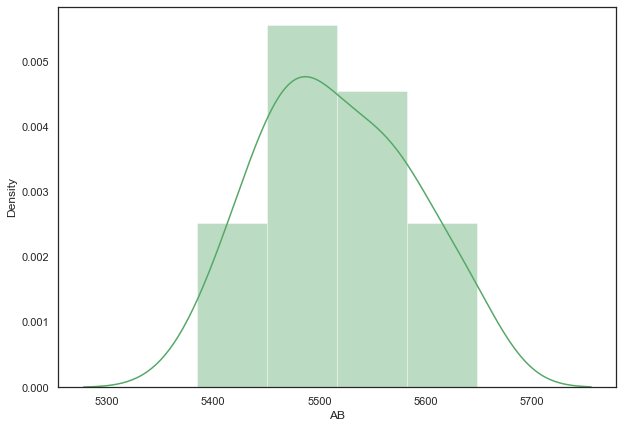

H
0.6362644174348592


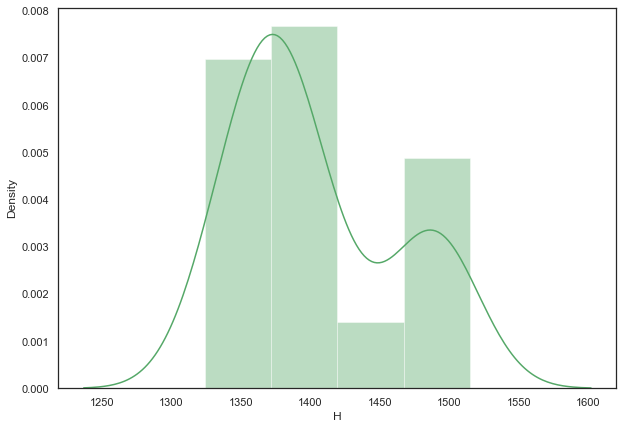

2B
-0.2189534077067715


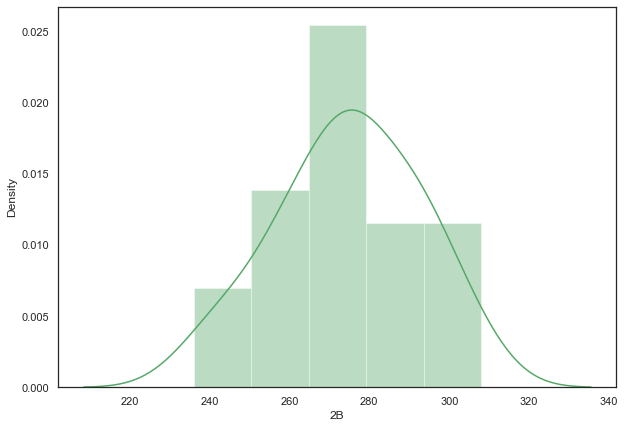

3B
0.12293523975827839


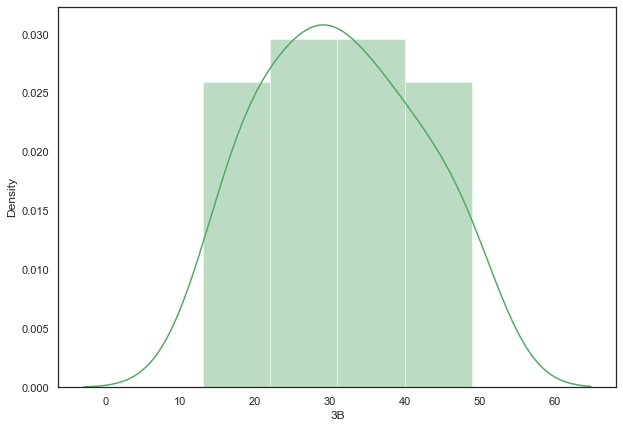

HR
0.49025146140832154


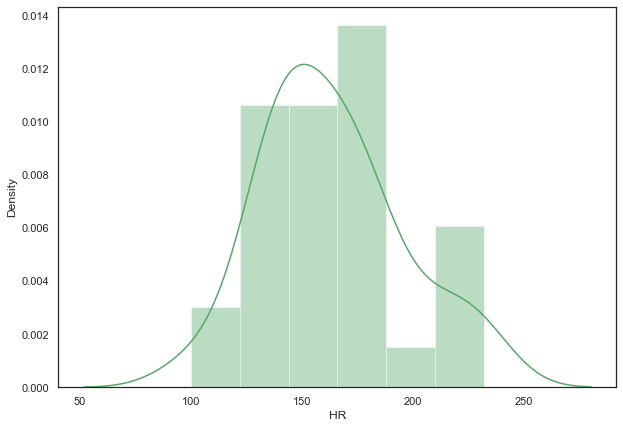

BB
0.15046085271433388


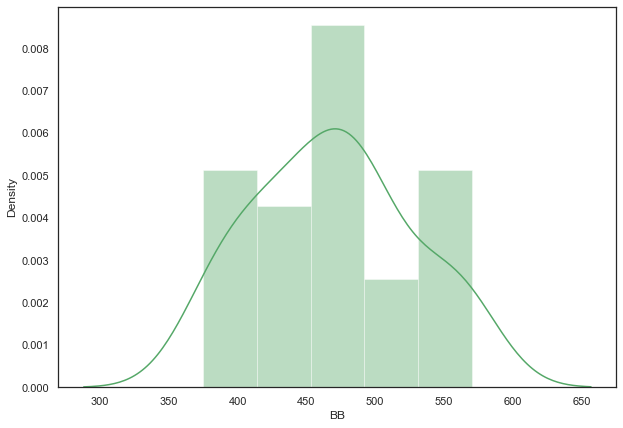

SO
-0.14815122992357777


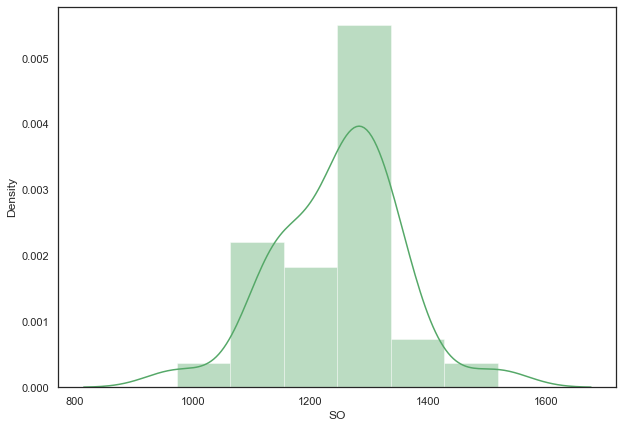

SB
0.4555569751737513


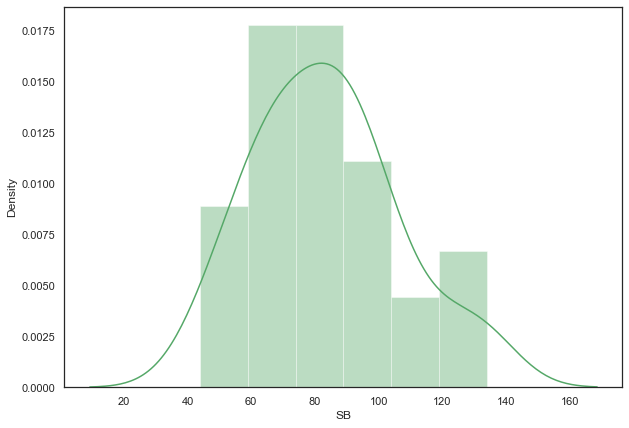

RA
0.04341475534967941


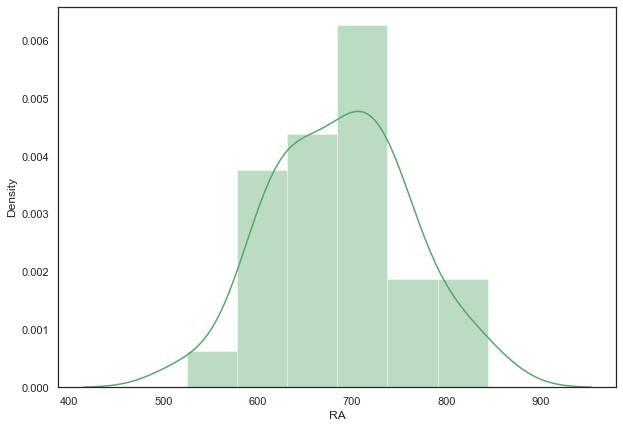

ER
0.055732557686200515


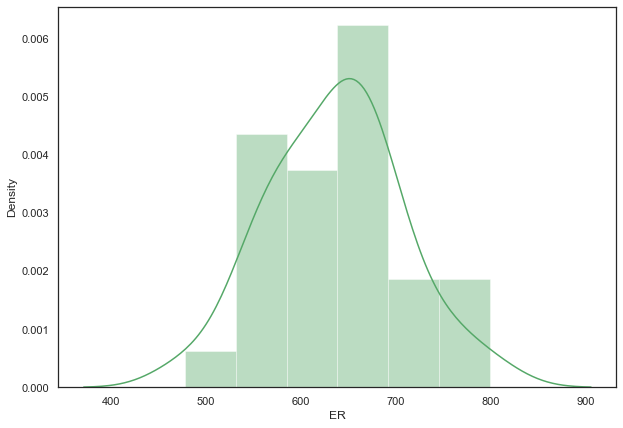

ERA
0.0506268488741678


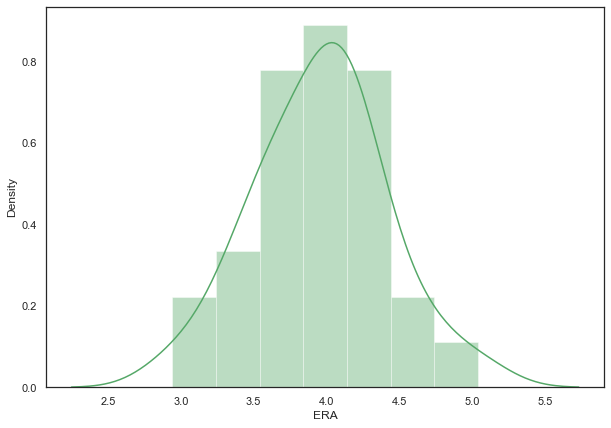

CG
0.6994790420153237


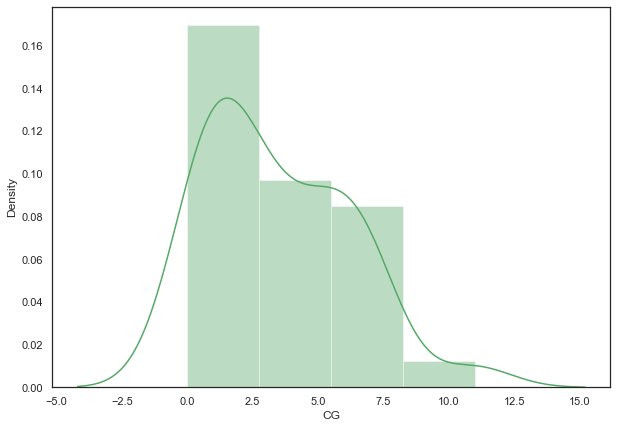

SHO
0.5370985776239573


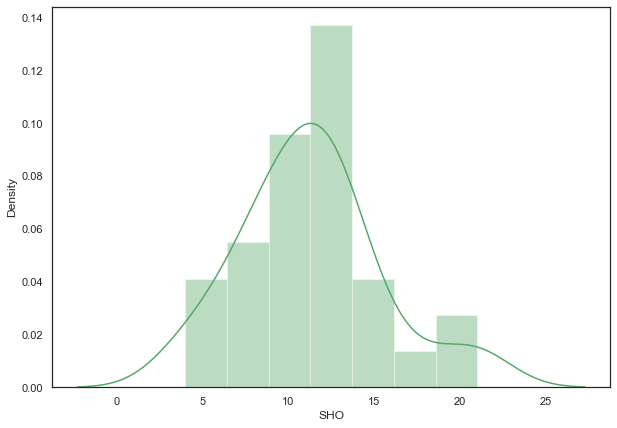

SV
0.6241798071870271


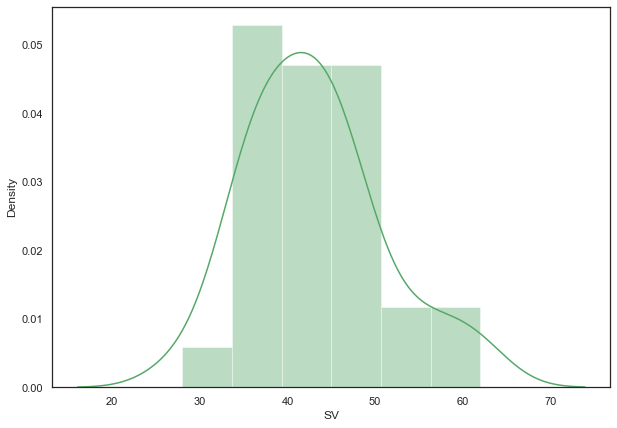

E
0.8449922672006391


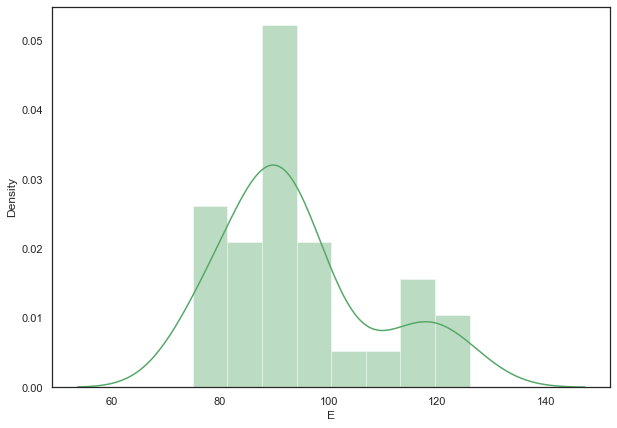

W_Target
0.04470076997798572


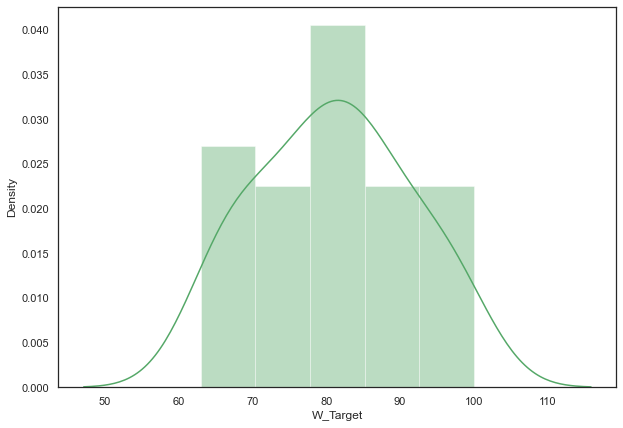

In [28]:
for i in bb:                 
    print(i)
    print(skew(bb[i]))
    
    plt.figure(figsize=[10,7])
    sns.distplot(bb[i],color='g')
    plt.show()

### Observation-4

From the other observation we conclude that:

1. In CG(complete games 0.73) and E(error 0.89) colunm highest skewness is present or we can say the high skewd data are present in CG and E colunm.


2. In H(hits) colunm some skewness(0.67) is present because the mean(1403) is high as compare to median values(1382).


3. Similarly SHO(shutouts) and SV(saves) colunms data are sked because in SHO the gap between 25%tile and 50%tile is not equal.and in SV colunm mean is high as compare to median.


4. In Runs(R) colunm skewness(1.20) is present or we can say the data are highly skewed in Runs(R) colunm.


5. In Ab(At Bats 0.18), 2B(Doubles -0.23), 3B(Triples 0.12), BB(Base on ball 0.15), SO(strikeout -0.15), RA(Runs allowed 0.04), ER(Earned Runs 0.05) and ERA(Earned Run Average 0.05) colunms less skewness (negligible) is present.

## Checking Correlation

### We will check correlation in 2 ways:
    
   ### 1.Correlation between the each colunm with target colunm.
   ### 2.Correlation between the colunms.

In [29]:
bb.corr()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E,W_Target
R,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262,0.430751
AB,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743,-0.087947
H,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173,0.037612
2B,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754,0.427797
3B,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678,-0.251118
HR,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597,0.307407
BB,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685,0.484342
SO,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133,0.111850
SB,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149,-0.157234
RA,-0.041623,0.316010,0.224324,-0.218160,0.314125,-0.103903,-0.416445,-0.129745,0.132290,1.000000,0.991018,0.986674,-0.016659,-0.636862,-0.616224,0.198996,-0.812952


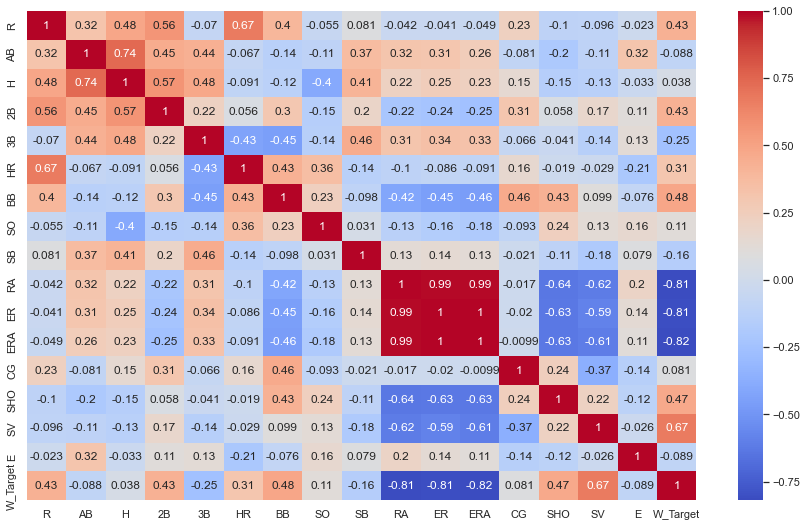

In [30]:
plt.figure(figsize=[15,9])
sns.heatmap(bb.corr(),annot=True,cmap='coolwarm')
plt.show()

<AxesSubplot:>

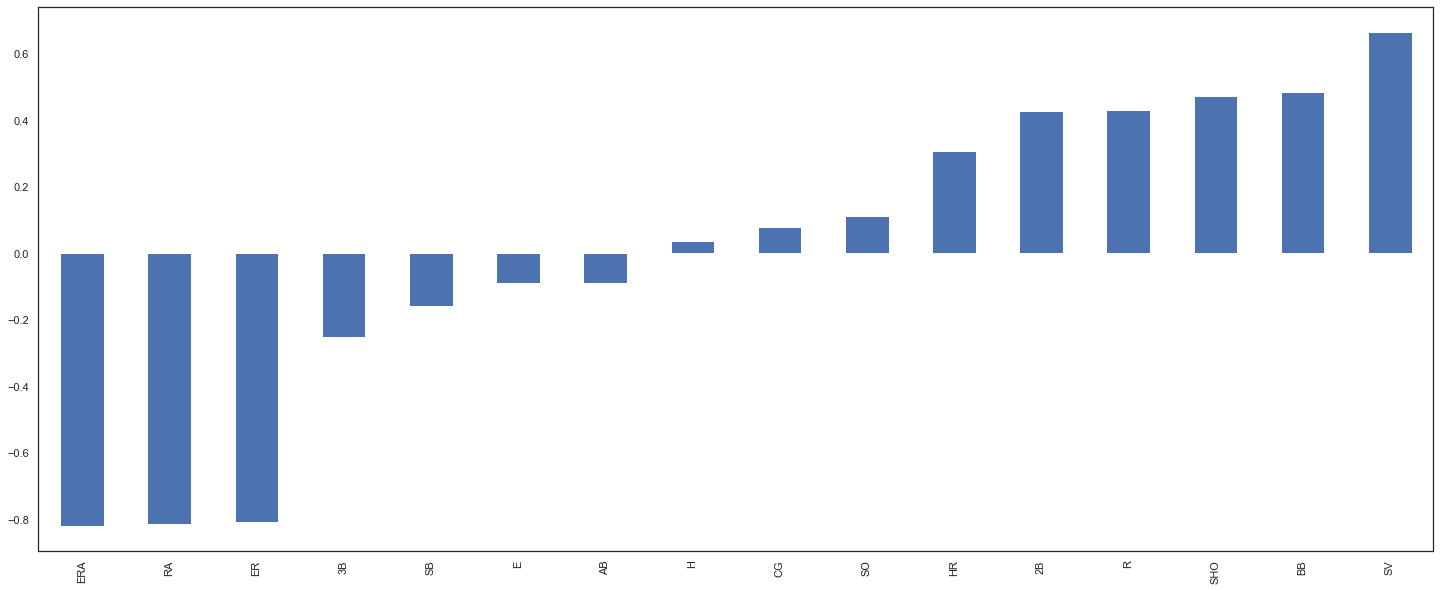

In [31]:
plt.figure(figsize =(25, 10))
bb.corr()['W_Target'].sort_values().drop(['W_Target']).plot(kind ='bar')

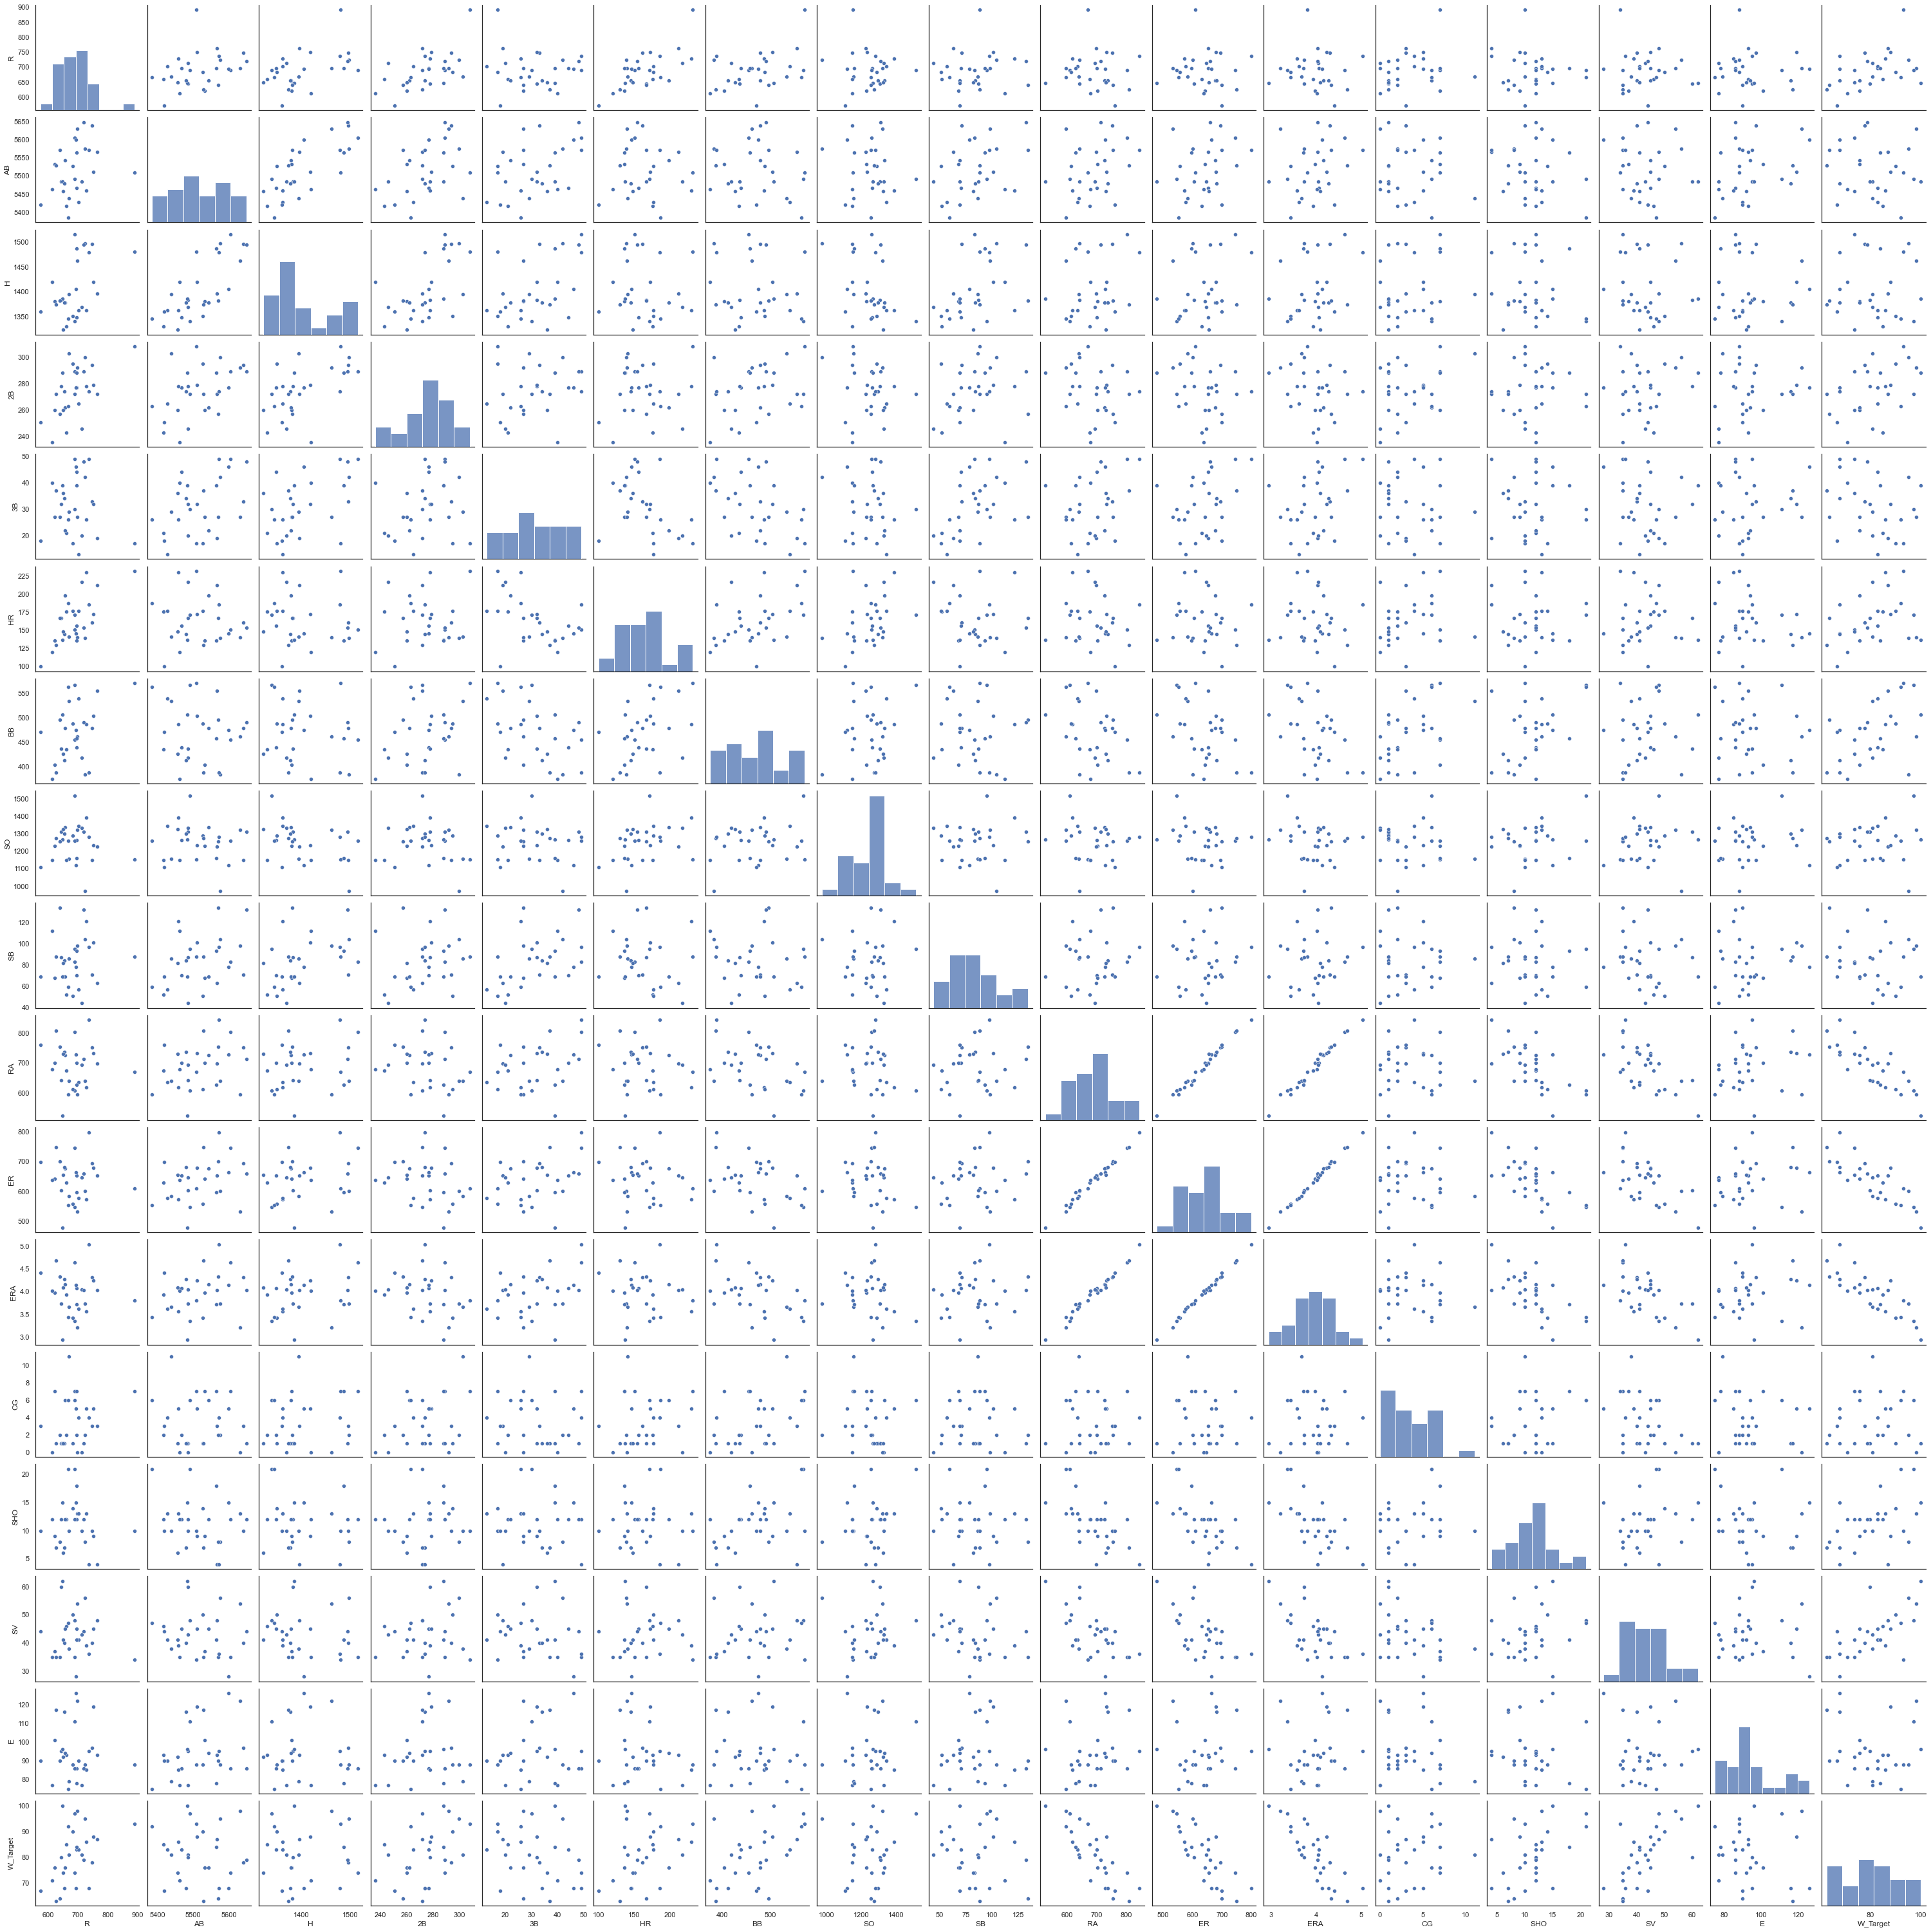

In [32]:
sns.pairplot(bb)
plt.show()

###### 1.Correlation between the each colunm with target colunm.

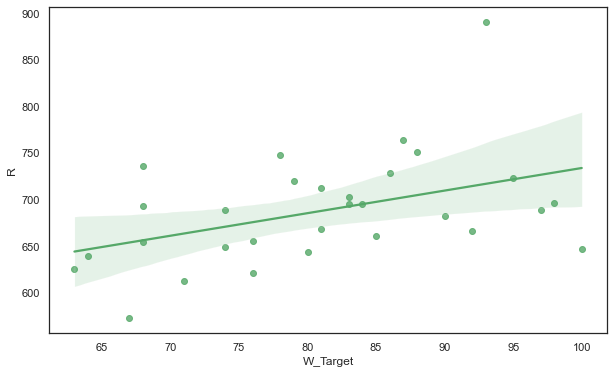

In [33]:
plt.figure(figsize=[10,6])
sns.regplot(data=bb,x='W_Target',y='R',color='g')
plt.show()

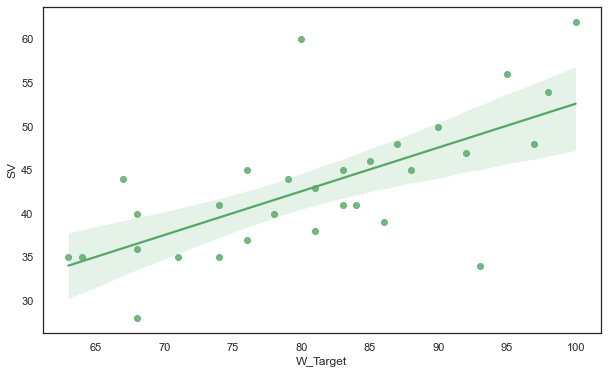

In [34]:
plt.figure(figsize=[10,6])
sns.regplot(data=bb,x='W_Target',y='SV',color='g')
plt.show()

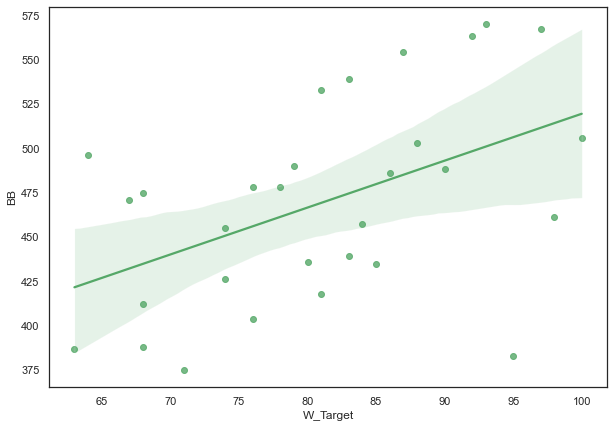

In [35]:
plt.figure(figsize=[10,7])
sns.regplot(data=bb,x='W_Target',y='BB',color='g')
plt.show()

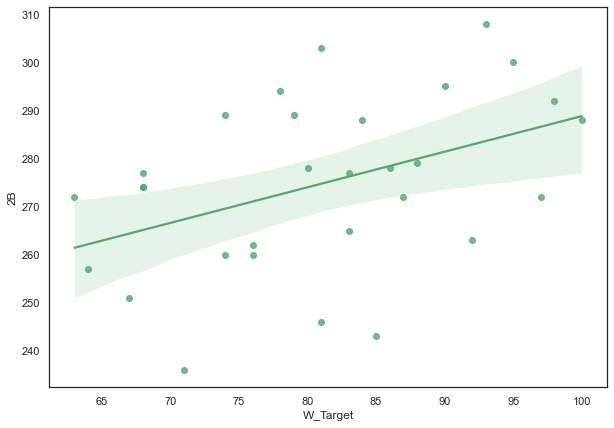

In [36]:
plt.figure(figsize=[10,7])
sns.regplot(data=bb,x='W_Target',y='2B',color='g')
plt.show()

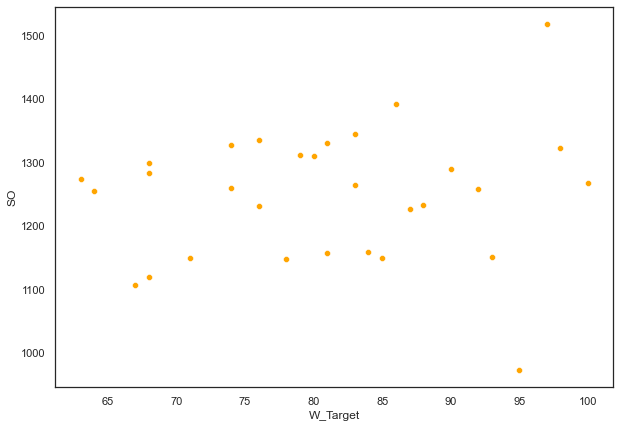

In [37]:
plt.figure(figsize=[10,7])
sns.scatterplot(data=bb,x='W_Target',y='SO',color='orange')
plt.show()

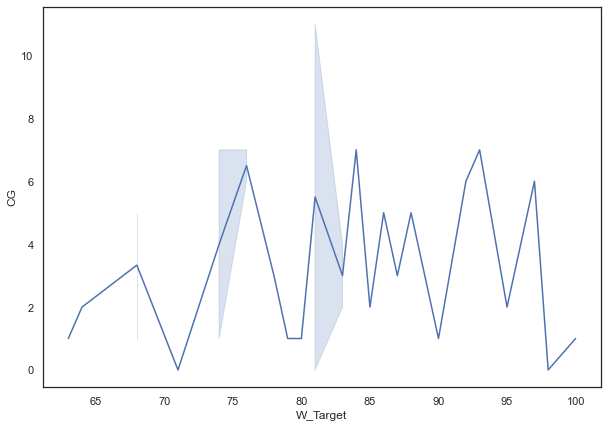

In [38]:
plt.figure(figsize=[10,7])
sns.lineplot(data=bb,x='W_Target',y='CG') 
plt.show()

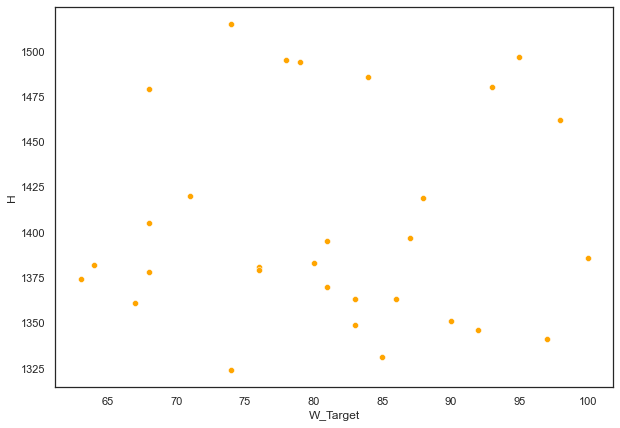

In [39]:
plt.figure(figsize=[10,7])
sns.scatterplot(data=bb,x='W_Target',y='H',color='orange')
plt.show()

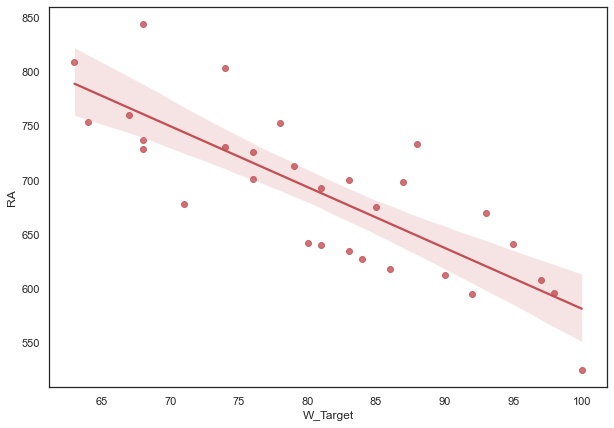

In [40]:
plt.figure(figsize=[10,7])
sns.regplot(data=bb,x='W_Target',y='RA',color='r')
plt.show()

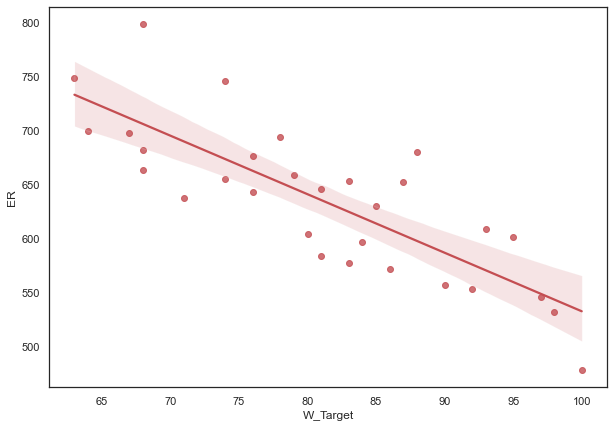

In [41]:
plt.figure(figsize=[10,7])
sns.regplot(data=bb,x='W_Target',y='ER',color='r')
plt.show()

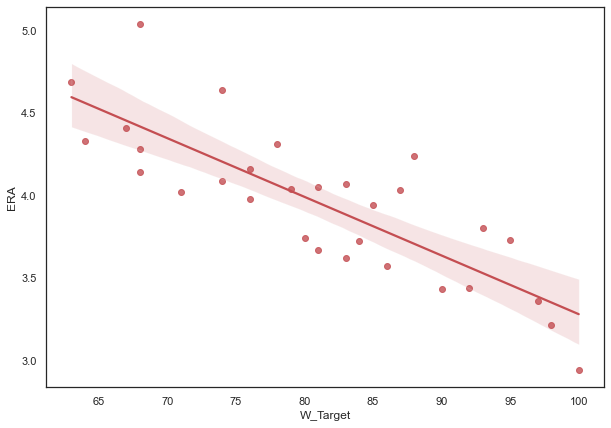

In [42]:
plt.figure(figsize=[10,7])
sns.regplot(data=bb,x='W_Target',y='ERA',color='r')
plt.show()

###### 2.Correlation between the colunms.

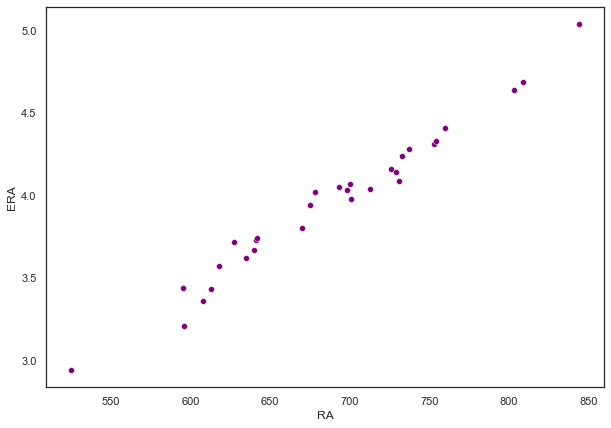

In [43]:
plt.figure(figsize=[10,7])
sns.scatterplot(data=bb,x='RA',y='ERA',color='purple')
plt.show()

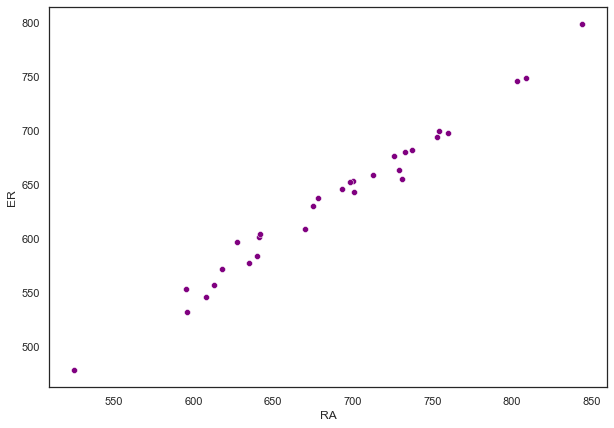

In [44]:
plt.figure(figsize=[10,7])
sns.scatterplot(data=bb,x='RA',y='ER',color='purple')
plt.show()

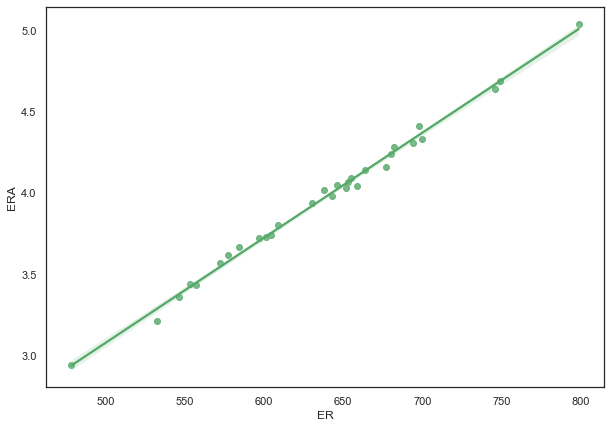

In [45]:
plt.figure(figsize=[10,7])
sns.regplot(data=bb,x='ER',y='ERA',color='g')
plt.show()

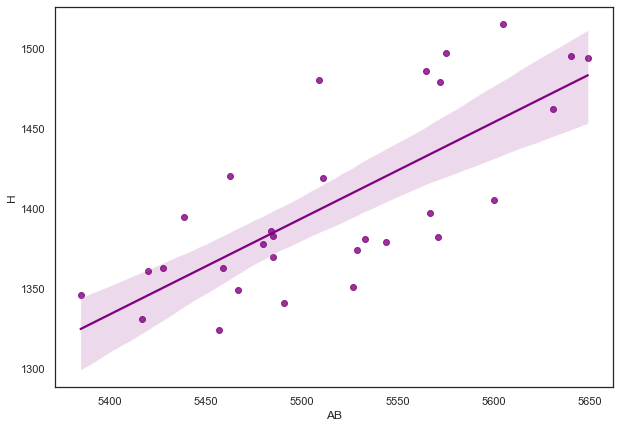

In [46]:
plt.figure(figsize=[10,7])
sns.regplot(data=bb,x='AB',y='H',color='purple')
plt.show()

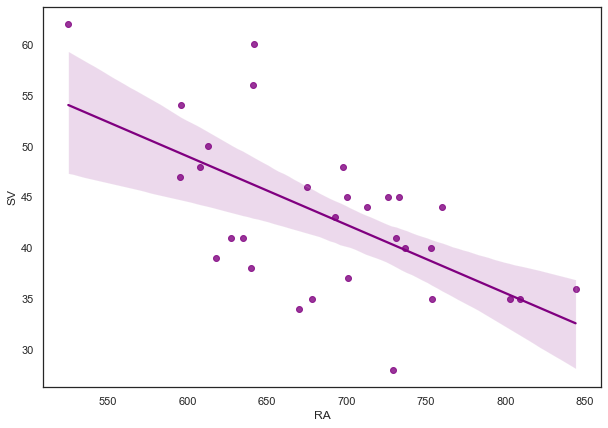

In [47]:
plt.figure(figsize=[10,7])
sns.regplot(data=bb,x='RA',y='SV',color='purple')
plt.show()

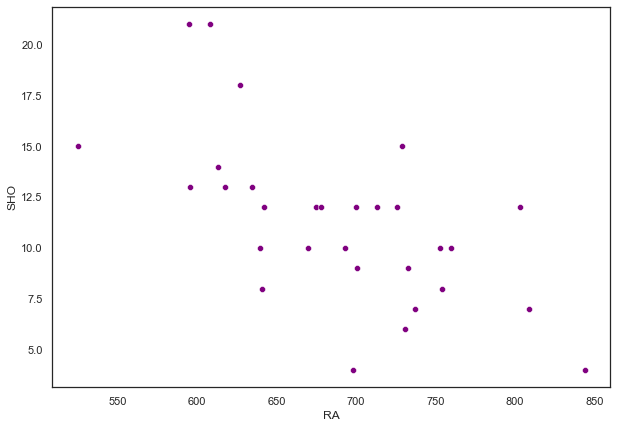

In [48]:
plt.figure(figsize=[10,7])
sns.scatterplot(data=bb,x='RA',y='SHO',color='purple')
plt.show()

### Observation-5

From above result we got three type of correlation:
    
  1. Positive correlation- when one increase another is also increase(both the variables are directly praposnal to each other).
  
    
  2. Negative correlation- when one increase another decrease(inversly prapornal to each other).
  
    
  3. Zero correlation- No correlation.
  

A. Runs and W_target column are positively correleted(0.43) with each other, Which can be considered as strong bond. 

B. Saves(SV) and W_target columns are also positively correleted(0.67) with other, Which can be considerd as strong bond.

c. Base on balls(BB)(0.48) and 2B(Doubles)(0.43) both are correleted with W_Target column, Which can be considerd as strong bond.

D. Runs allowed(RA)(-0.81) and W_target columns are negatively correleted with each other, which can be considerd as poor bond.

E. Earned Runs(ER)(-0.81) and Earned Run Average(EPR)(-0.82) both the columns are highly negative correlated with the W_Target colunms, which can be considered as a poor bond.

F. Strikeouts(SO)(0.11) and Complete Games(CG)(0.081) both the columns make the zero correlation with the W_target colunms.

G. Similarly Hits(H)(0.038) column makes zero correlation with W_Target colunm.

H. Earned Run Average(ERA) and Runs Allowed(RA) columns are making 99% correlation with each other, which can be considered as a strong bond.

I. Earned Runs(ER) and Earned Run Average(ERA) columns are making 100% correlation with each other.

J. Runs Allowed(RA) and Earned Runs(ER) columns are making 99% correlation with each other, which can be considered as a strong bond.

K. At Bats(AB) and Hits(H) columns are making 74% correlation with each others.

L. Runs Allowed(RA) and Saves(SV) columns have -0.62(negative) correlation with each other. 

M. RA and SHO columns have -0.64(negative) correlation with each other.

# Data Preprocessing 

### Removing Outliers

In [49]:
import scipy
from scipy.stats import zscore

In [50]:
z=np.abs(zscore(outliers_present))
z.shape

(30, 5)

In [51]:
threshold=3
print(np.where(z>3))

(array([5], dtype=int64), array([0], dtype=int64))


In [52]:
bb_new=bb[(z<3).all(axis=1)]

In [64]:
bb_new.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E,W_Target
0,724,5575,7.311886,300,42,139,383,973,104,641,601,3.73,-0.307098,-0.787002,1.532753,-0.348265,95
1,696,5467,7.207860,277,44,156,439,1264,70,700,653,4.07,-0.307098,0.236737,0.312020,-0.540820,83
2,669,5439,7.241366,303,29,141,533,1157,86,640,584,3.67,2.011315,-0.252844,-0.664137,-1.326125,81
3,622,5533,7.231287,260,27,136,404,1231,68,701,643,3.98,1.264463,-0.513555,-0.820689,0.650818,76
4,689,5605,7.323831,289,49,151,455,1259,83,803,746,4.64,1.264463,0.236737,-1.149165,-0.540820,74


In [54]:
bb_new.shape

(29, 17)

In [55]:
loss_of_data=((30-29)/30)*100
print("Loss Percent:",loss_of_data)

Loss Percent: 3.3333333333333335


.

## Removing Skewness

Removing skewness using power transformation technique.

In [57]:
from sklearn.preprocessing import power_transform

Checking skewness(old bb_new)

In [58]:
bb_new.skew()   

R          -0.215364
AB          0.169573
H           0.783772
2B         -0.335304
3B          0.090124
HR          0.450862
BB          0.151193
SO         -0.233815
SB          0.494966
RA          0.018155
ER          0.018461
ERA         0.016693
CG          0.854980
SHO         0.526943
SV          0.627480
E           0.840271
W_Target    0.119013
dtype: float64

In [59]:
Skewness_present=bb_new[['H','E','SV','CG','SHO']]

In [60]:
#Removing skewness in H using log1p
bb_new["H"]=np.log1p(bb_new["H"])

In [61]:
bb_new[['E','SV','CG','SHO']]=power_transform(bb_new[['E','SV','CG','SHO']],method='yeo-johnson')

In [62]:
bb_new.skew()

R          -0.215364
AB          0.169573
H           0.738455
2B         -0.335304
3B          0.090124
HR          0.450862
BB          0.151193
SO         -0.233815
SB          0.494966
RA          0.018155
ER          0.018461
ERA         0.016693
CG         -0.045947
SHO         0.000529
SV         -0.000925
E           0.065585
W_Target    0.119013
dtype: float64

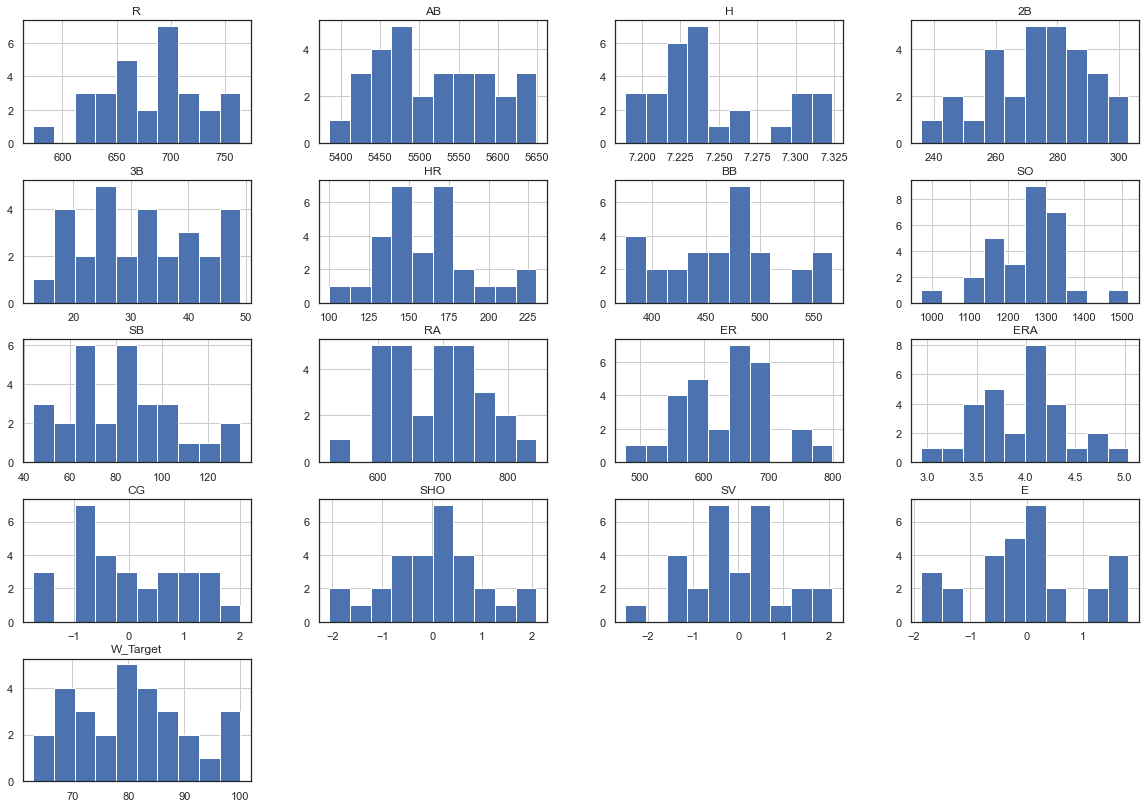

In [63]:
bb_new.hist(figsize=(20,14))
plt.show()

##### Spliting the columns

In [443]:
x = bb_new.iloc[:,0:-1]
y = bb_new.iloc[:,-1]

## Scaling the data :

In [446]:
from sklearn.preprocessing import StandardScaler

In [447]:
SS=StandardScaler()
X_new = pd.DataFrame(SS.fit_transform(x), columns=x.columns)

In [449]:
X_new.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.959398,0.830084,1.723726,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.307098,-0.787002,1.532753,-0.348265
1,0.331147,-0.702831,-0.949846,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,-0.307098,0.236737,0.312020,-0.540820
2,-0.274666,-1.100253,-0.088700,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,2.011315,-0.252844,-0.664137,-1.326125
3,-1.329231,0.233951,-0.347747,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,1.264463,-0.513555,-0.820689,0.650818
4,0.174084,1.255894,2.030708,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,1.264463,0.236737,-1.149165,-0.540820


# VIF:
### Variance inflation factor:

In [450]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [452]:
def vif(x):
    vif=pd.DataFrame()
    vif['Variables']=X_new.columns
    vif['VIF Factors']=[variance_inflation_factor(X_new.values,i) for i in range(X_new.shape[1])]
    return vif

In [453]:
vif(X_new)

,Variables,VIF Factors
0,R,7.112342
1,AB,20.237195
2,H,10.114607
3,2B,3.528059
4,3B,3.227808
5,HR,8.736960
6,BB,3.324550
7,SO,2.811546
8,SB,1.955254
9,RA,200.826177


From the above table we can say that the high Multicollinearity is present in between ER and ERA columns, So we can think to drop ER.

In [455]:
X_new.drop(['ER'],axis=1,inplace=True)

Again Checking 

In [456]:
vif(X_new)

,Variables,VIF Factors
0,R,6.069116
1,AB,7.791456
2,H,9.340727
3,2B,3.227862
4,3B,3.125190
5,HR,7.474108
6,BB,3.323583
7,SO,2.786186
8,SB,1.787493
9,RA,142.535647


From the above table we can say that the high Multicollinearity is present in between RA and ERA columns, So we can think to drop ERA.

In [457]:
X_new.drop(['ERA'],axis=1,inplace=True)

In [458]:
vif(X_new)

,Variables,VIF Factors
0,R,6.019438
1,AB,5.210230
2,H,7.728111
3,2B,3.165732
4,3B,2.981242
5,HR,6.168639
6,BB,3.053363
7,SO,2.287734
8,SB,1.773119
9,RA,4.759240


Now we do not have multicolinearity.....

.
## Model learning phase-prediction phase

So basically it will become important to know which type of machine learning model we are going to construct.It depends on the target.
Now we are going to use Regression model because our target column is continious in nature.

For regression model, Some matrix we are going to find like:

1. R2 score

2. Mean absolute error

3. Mean squred error

4. Root Mean squared error

##### Importing important lib.

In [560]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xg

### Finding best random state

In [523]:
def model_select(model):
    max_score=0
    max_state=0
    for p in range(0,100):
        x_train, x_test, y_train, y_test = train_test_split(X_new,y,test_size=0.22, random_state=p)
        md=model()
        md.fit(x_train,y_train)
        predict=md.predict(x_test)
        r2score=r2_score(y_test,predict)
        if r2score>max_score:
            max_score=r2score
            max_state=p
    print("Max score is {} with random state {}".format(max_score,max_state))

.

In [524]:
model_select(LinearRegression)

Max score is 0.9245787632308347 with random state 47


In [525]:
x_train,x_test,y_train,y_test=train_test_split(X_new,y,test_size=0.22,random_state=47)

In [526]:
x_train.shape

(22, 14)

In [527]:
y_train.shape

(22,)

In [528]:
x_test.shape

(7, 14)

In [529]:
y_test.shape

(7,)

### Linear Regressor

In [772]:
LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
pred=LR.predict(x_test)

0.9708319890396465


In [773]:
print('Mean_squared error:',mean_squared_error(pred,y_test))
print('Mean absolute error:',mean_absolute_error(pred,y_test))
print('r2_score:',r2_score(pred,y_test))

msel=cross_val_score(LR,x,y,scoring='neg_mean_squared_error',cv=7)
print('Cross validation of linear regression is:',-msel.mean())

Mean_squared error: 67.66129231180305
Mean absolute error: 7.3983576907636746
r2_score: 0.5789555454767608
Cross validation of linear regression is: 51.62137253637523


## Decision tree regressor

### Find best random state for Decision tree regressor

In [774]:
model_select(DecisionTreeRegressor)

Max score is 0.8332687838884585 with random state 65


In [775]:
x_train,x_test,y_train,y_test=train_test_split(X_new,y,test_size=0.22,random_state=30)

In [776]:
Dt=DecisionTreeRegressor()
Dt.fit(x_train,y_train)
print(Dt.score(x_train,y_train))
pred=Dt.predict(x_test)

1.0


In [777]:
print("r2 score : ",r2_score(pred,y_test))
print("Mean absoluate error :",mean_absolute_error(pred,y_test))
print("Means squred error:" ,mean_squared_error(pred,y_test))
print("Root mean squred error: ",np.sqrt(mean_squared_error(pred,y_test)))


msed=cross_val_score(Dt,x,y,scoring='neg_mean_squared_error',cv=7)
print('Cross validation of Decision tree regressor is',-msed.mean())

r2 score :  0.44623131903833657
Mean absoluate error : 7.285714285714286
Means squred error: 69.57142857142857
Root mean squred error:  8.340948901139999
Cross validation of Decision tree regressor is 87.77142857142857


## K neighbors regressor

### Find best random state for K neighbors regressor

In [778]:
model_select(KNeighborsRegressor)

Max score is 0.7086987407168228 with random state 61


In [842]:
x_train,x_test,y_train,y_test=train_test_split(X_new,y,test_size=0.20,random_state=61)

In [843]:
Knn=KNeighborsRegressor()
Knn.fit(x_train,y_train)
print(Knn.score(x_train,y_train))
pred=Knn.predict(x_test)

0.647336758245849


In [844]:
print("r2 score : ",r2_score(y_test,pred))
print("Mean absoluate error :",mean_absolute_error(y_test,pred))
print("Means squred error:" ,mean_squared_error(y_test,pred))
print("Root mean squred error: ",np.sqrt(mean_squared_error(y_test,pred)))

msek=cross_val_score(Knn,x,y,scoring='neg_mean_squared_error',cv=7)
print('Cross validation of Kneighbor regressor is',-msek.mean())

r2 score :  0.7178818112049117
Mean absoluate error : 4.033333333333334
Means squred error: 30.633333333333336
Root mean squred error:  5.534738777334784
Cross validation of Kneighbor regressor is 72.84542857142856


# Ensemble techniques

## RandomForestRegressor

### Find best random state for Random forest regressor

In [835]:
model_select(RandomForestRegressor)

Max score is 0.8016756513409962 with random state 4


In [839]:
x_train,x_test,y_train,y_test=train_test_split(X_new,y,test_size=0.20,random_state=46)

In [840]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
predi=rfr.predict(x_test)
print(rfr.score(x_train,y_train))

0.940240441465653


In [841]:
print("r2 score:",r2_score(y_test,predi))
print("Mean absolute error",mean_absolute_error(y_test,predi))
print("Mean squared error:",mean_squared_error(y_test,predi))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,predi)))

mser=cross_val_score(rfr,x,y,scoring='neg_mean_squared_error',cv=7)
print('Cross validation of Random forest regressor is',-mser.mean())

r2 score: 0.7108984010963909
Mean absolute error 3.568333333333333
Mean squared error: 17.57898333333334
Root mean squared error: 4.19272981878553
Cross validation of Random forest regressor is 47.96066499999999


## Adaboost Regressor

### Find best random state for Adaboot regressor

In [786]:
model_select(AdaBoostRegressor)

Max score is 0.840102606864902 with random state 33


In [787]:
x_train,x_test,y_train,y_test=train_test_split(X_new,y,test_size=0.22,random_state=23)

In [788]:
adaa=AdaBoostRegressor()
adaa.fit(x_train,y_train)
pre=adaa.predict(x_test)
print(adaa.score(x_train,y_train))

0.9919216944428042


In [789]:
print("r2 score:",r2_score(y_test,pre))
print("Mean absolute error",mean_absolute_error(y_test,pre))
print("Mean squared error:",mean_squared_error(y_test,pre))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pre)))

msea=cross_val_score(adaa,x,y,scoring='neg_mean_squared_error',cv=7)
print('Cross validation of Adaboost regressor is',-msea.mean())

r2 score: 0.7882117199832479
Mean absolute error 4.857142857142857
Mean squared error: 29.814603174603178
Root mean squared error: 5.460275009063479
Cross validation of Adaboost regressor is 48.357559544306696


## GradientBoostingRegressor

### Find best random state for Gradient boosting regressor

In [790]:
model_select(GradientBoostingRegressor)

Max score is 0.8502754470414802 with random state 4


In [791]:
x_train,x_test,y_train,y_test=train_test_split(X_new,y,test_size=0.22,random_state=4)

In [792]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
prt=gbr.predict(x_test)
print(gbr.score(x_train,y_train))

0.999999948819115


In [793]:
print("r2 score:",r2_score(y_test,prt))
print("Mean absolute error:",mean_absolute_error(prt,y_test))
print("Mean squared error:",mean_squared_error(prt,y_test))
print("Root mean squared error:",np.sqrt(mean_squared_error(prt,y_test)))

mseg=cross_val_score(gbr,x,y,scoring='neg_mean_squared_error',cv=7)
print('Cross validation of Gradient bossting regressor is ',-mseg.mean())

r2 score: 0.8789806071753422
Mean absolute error: 2.6655185473104206
Mean squared error: 12.892270011116608
Root mean squared error: 3.5905807345214518
Cross validation of Gradient bossting regressor is  50.95832339215698


## Xgboost Regressor

### Find best random state for xgboost regressor

In [794]:
model_select(xg.XGBRegressor)

Max score is 0.784460841545365 with random state 4


In [795]:
x_train,x_test,y_train,y_test=train_test_split(X_new,y,test_size=0.22,random_state=4)

In [796]:
xgbs=xg.XGBRegressor()
xgbs.fit(x_train,y_train)
pred=xgbs.predict(x_test)
print(xgbs.score(x_train,y_train))

0.9999999965114181


In [797]:
print("r2 score:",r2_score(y_test,pred))
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

msex=cross_val_score(xgbs,x,y,scoring='neg_mean_squared_error',cv=7)
print('Cross validation of xgboost regressor is',-msex.mean())

r2 score: 0.784460841545365
Mean absolute error: 3.1840667724609375
Mean squared error: 22.96151851292234
Root mean squared error: 4.7918178714264945
Cross validation of xgboost regressor is 61.893667490001306


## Lasso Regressor:

### Find best random state for Lasso regressor

In [798]:
model_select(Lasso)

Max score is 0.9323531105801476 with random state 82


In [823]:
x_train,x_test,y_train,y_test=train_test_split(X_new,y,test_size=0.30,random_state=82)

In [824]:
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100))}
ls=Lasso()
L=GridSearchCV(ls,parameters)
L.fit(x_train,y_train)
print(L.best_params_)

{'alpha': 1, 'random_state': 0}


In [831]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
pred=ls.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('Mean Squared error:',mean_squared_error(y_test,pred))
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

mselr=cross_val_score(lr,x,y,scoring='neg_mean_squared_error',cv=5)
print('Cross validation of Lasso regressor is',-mselr.mean())

R2_score: 0.6774145226012229
Mean Squared error: 17.714323499626673
Mean absolute error: 3.1712057035015198
root mean squared error: 4.208838735283958
Cross validation of Lasso regressor is 68.69607551018711


## Ridge Regressor:

### Find best random state for Ride regressor

In [815]:
model_select(Ridge)

Max score is 0.9163603960559206 with random state 75


In [820]:
x_train,x_test,y_train,y_test=train_test_split(X_new,y,test_size=0.30,random_state=75)

In [821]:
parameters={'alpha':[0.001,0.01,0.1,1,10],'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']}
rd=Ridge()
Z1=GridSearchCV(rd,parameters)
Z1.fit(x_train,y_train)
print(Z1.best_params_)

{'alpha': 10, 'solver': 'sparse_cg'}


In [834]:
r=Ridge()
r.fit(x_train,y_train)
y_pred=r.predict(x_test)
print('Mean squared error ',mean_squared_error(y_test,y_pred))
print('Root mean squared error ',mean_squared_error(y_test,y_pred,squared=False))
print('mean absolute error ',mean_absolute_error(y_test,y_pred))
print('r2 score ',r2_score(y_test,y_pred))

mserd=cross_val_score(rd,x,y,scoring='neg_mean_squared_error',cv=4)
print('Cross validation of Ridge regressor is',-mserd.mean())

Mean squared error  37.41124841471231
Root mean squared error  6.116473527671996
mean absolute error  5.215169139820767
r2 score  0.31872501762776584
Cross validation of Ridge regressor is 48.01121873483927


.

###  Best model

### We are chosing KNeighbors Regressor as a best model, Because this model has least diffrence between R2_score and cross validation score and also its accuracy is high as compare to others.
##### R2 score is : 71.78
##### Cross_validation score : 72.84
##### Diffrence : 1.06

## Hyper Parameter tuning

In [862]:
parameter = [{'n_neighbors': [3, 5, 7, 9],
         'weights': ['uniform', 'distance'],
         'leaf_size': [15, 20],
              'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}]


In [873]:
GVC=GridSearchCV(KNeighborsRegressor(),parameter,cv=9)
GVC.fit(x_train,y_train)
GVC.best_params_

{'algorithm': 'auto', 'leaf_size': 15, 'n_neighbors': 3, 'weights': 'uniform'}

In [874]:
GVC.best_estimator_

KNeighborsRegressor(leaf_size=15, n_neighbors=3)

In [879]:
Knn_model=KNeighborsRegressor(leaf_size=15, n_neighbors=3)
Knn_model.fit(x_train,y_train)
pred=Knn_model.predict(x_test)
print("r2 score : ",r2_score(y_test,pred))
print("Mean absoluate error :",mean_absolute_error(y_test,pred))
print("Means squred error:" ,mean_squared_error(y_test,pred))
print("Root mean squred error: ",np.sqrt(mean_squared_error(y_test,pred)))

r2 score :  0.7789716039907904
Mean absoluate error : 3.555555555555555
Means squred error: 24.00000000000001
Root mean squred error:  4.8989794855663575


### We have done with Hyper parameter tuning and got 77.89% accuracy .

#### Saving the model

In [881]:
import joblib

In [882]:
joblib.dump(Knn_model,"Baseball_Season.pkl")

['Baseball_Season.pkl']

# Conclusion:

From the above process we can conclude that:
    
    1. In our data set we had numerical dtype values, So there was no need to adopt encoding technique.
    
    1(A).Null values was not present in our data set, that why we did not go for imputation technique.
    
    2. We performed hole EDA process to get the insights from the data set, in oreder to doing this we got many relation between tha input data and output data.
    
    3. When we went under the preprocessing part we found some outliers and skewness.In oreder to remove these and clean the data we adopted Zscore method and power transform method.
    
    4. Then we had gone to Standardize our data in the single scale. For this we used standard scaler.
    
    5. Then we adopted VIF technique to find out the multicollinerity between the column. In order remove it we droped some column.
    
    6. Our model was based on linear regression that is why we used Regressor .
    
    7. Fristly we find best random state for each model separately.
    
    8. Then we used many regressor like-
        
        1.K nearest neighbour 

        2.Design tree

        3.Linear regression
        
    9.To boost our model accuracy we used ensamble techniques like:
        
        1.Random forest regressor
        
        2.Adaboost regressor
        
        3.Gradient boosting regressor
        
        4.XGboost regressor
        
        5.Lasso and ridge regressor
        
    10. K nearest neighbour gave us best accuracy becasue, in this model we got minimum diffrence between cross validation and R2 score i.e. 1.06
    
    11. In order to remove under fitting and over fitting we apply cross-validation in our all the model and finally we found our best model and best accuracy.
    
    12. But we tried one more time to increase our model accuracy,for this we had gone for Hyper parameter tuning and took the help of Grid search cv for this.
    
    13.Finally we acchived 77.89% accuracy of Knearest neighbour regressor , which gave us best accuracy as well as best model.
    
    14. With the help of joblib we saved our model with best parameters.
    
### We are chosing KNeighbors Regressor as a best model, Because this model has least diffrence between R2_score and cross validation score and also its accuracy is high as compare to others.
##### R2 score is : 71.78
##### Cross_validation score : 72.84
##### Diffrence : 1.06


###### Now our model is ready for prediction

